<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/data_clean.csv",index_col=0)

In [3]:
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(158, 9)

In [6]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [8]:
df1= df

In [9]:
data =df.copy()

In [10]:
data["Month"] = pd.to_numeric(data["Month"],errors="coerce")
data["Temp C"] = pd.to_numeric(data["Temp C"],errors="coerce") #coerce will introduce NA to non numeric values
data["Weather"] = data["Weather"].astype("category")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


# Duplicates

In [12]:
data[data.duplicated()].shape

(1, 9)

In [13]:
#to print that duplicated row we use:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [14]:
#now to remove this row we will use this:
data_cleaned1 = data.drop_duplicates()

In [15]:
data_cleaned1.shape

(157, 9)

# TO DROP COLUMNS

In [16]:
data_cleaned2 = data_cleaned1.drop("Temp C", axis=1) # we use axis=1 to show for columns and axis =0 for the rows

In [17]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename columns

In [18]:
data_cleaned3 = data_cleaned2.rename({"Solar.R":"Solar"},axis=1)

In [19]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# OUTLIER detection

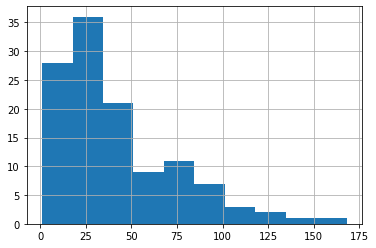

In [20]:
data_cleaned3["Ozone"].hist()

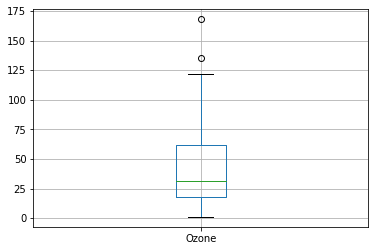

In [21]:
data_cleaned3.boxplot("Ozone")

In [22]:
data_cleaned3["Ozone"].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [23]:
data_cleaned3["Weather"].value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

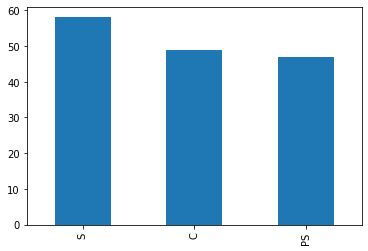

In [24]:
data_cleaned3["Weather"].value_counts().plot.bar()

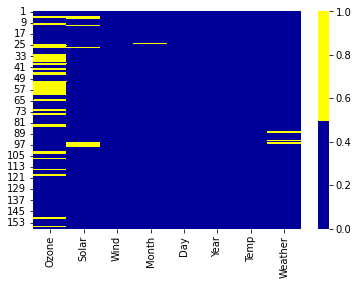

In [28]:
import seaborn as sns
cols = data_cleaned3.columns #we are collecting the columns
colours = ["#000099","#ffff00"] #the code is yellow for missing values and blue for not missing
sns.heatmap(data_cleaned3[cols].isnull(),cmap = sns.color_palette(colours))

In [30]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head() #showing top 5 rows with missing values

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [31]:
data_cleaned3.isnull().sum() #columns wise missing valus sum

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

# now we will be imputing the missing values wirh mean or mode whatver we find

In [32]:
mean = data_cleaned3["Ozone"].mean()

In [33]:
print(mean)

41.81512605042017


In [34]:
data_cleaned3["Ozone"]=data_cleaned3["Ozone"].fillna(mean)

In [35]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S
